In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import sys

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

sys.path.insert(0,'../charles/helpers')
import helper
import joblib
import itertools
from statistics import mean

In [2]:
data = pd.read_csv('../communal/Ames_Housing_Price_Data_cleaned_2.csv', header = [0])
data.head()

pd.set_option("display.max_columns", None)

data.drop(['PID', 'lot_bucket', 'mean_LotFrontage', 'Prop_Addr', 'GarageYrBlt', 'lat', 'long'], axis = 1, inplace = True)

data.drop(['YearRemodAdd', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
           'TotRmsAbvGrd', 'GarageCars'], axis = 1, inplace = True)
data['Total_Porch'] = data['OpenPorchSF'] + data['EnclosedPorch'] + \
                      data['3SsnPorch'] + data['ScreenPorch']
data.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'],
           axis = 1, inplace = True)

In [3]:
top_20_list = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt',
              'GarageArea', 'BsmtFullBath', 'Neighborhood_Crawfor', 'CentralAir_Y',
              'Neighborhood_Somerst', 'BldgType_Twnhs', 'BsmtExposure_Gd', 
              'Neighborhood_Edwards', 'KitchenQual_TA', 'Neighborhood_MeadowV',
              'Condition1_Norm', 'Neighborhood_NridgHt', 'Fireplaces', 'MSZoning_RL',
              'HeatingQC_TA']

In [4]:
top_10_list = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt',
              'GarageArea', 'BsmtFullBath', 'Neighborhood_Crawfor', 'CentralAir_Y',
              'Neighborhood_Somerst']

In [5]:
data.drop([115, 132, 141, 335, 490, 538, 2047, 2239], inplace = True)

In [8]:
y = data['SalePrice'].apply(lambda x: np.log(x))
x = data.drop(['SalePrice'], axis = 1)
x = pd.get_dummies(x, drop_first = True)
x = x[top_20_list]

In [9]:
top_20_subset_list = []
for i in range(len(top_20_list)):
    top_20_subset_list.append(top_20_list[:i+1])

In [11]:
train_scores = []
test_scores = []
alphas = []
betas = []

In [12]:
for i in range(len(top_20_subset_list)):
    train_list = []
    test_list = []
    alpha_list = []
    beta_list = []
    for j in range(50):
        np.random.seed(j)
        x_train, x_test, y_train, y_test = train_test_split(x[top_20_subset_list[i]],y)
        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)
        params = {'alpha': np.linspace(1e-7,1e-3,5000)}
        model = GridSearchCV(Lasso(max_iter = 500000), params, cv = 5)
        model.fit(x_train, y_train)
        train_score = model.score(x_train, y_train)
        train_list.append(train_score)
        model.fit(x_test, y_test)
        test_score = model.score(x_test, y_test)
        test_list.append(test_score)
        alpha_list.append(model.best_estimator_.alpha)
        coefs = model.best_estimator_.coef_
        coef_list = list(zip(coefs, x[top_20_subset_list[i]].columns))
        sorted_coef_list = sorted(coef_list, key = lambda x: abs(x[0]), reverse = True)
        beta_list.append(sorted_coef_list)
    train_scores.append(train_list)
    test_scores.append(test_list)
    alphas.append(alpha_list)
    betas.append(beta_list)

In [42]:
model.best_estimator_.intercept_

10.366273334322479

In [13]:
train_scores

[[0.520164005761514,
  0.5059309448748297,
  0.5162211614976696,
  0.5170914943092504,
  0.5380082612395802,
  0.5291668437487091,
  0.5136876278013105,
  0.5147791321561241,
  0.5346177199492594,
  0.5252437295977879,
  0.5050827049402448,
  0.5183655519927377,
  0.517360592780069,
  0.5039741026418585,
  0.5128680052489807,
  0.5339248051367731,
  0.5275657951203754,
  0.512226268026871,
  0.5162856727686238,
  0.530738705500424,
  0.534375395139935,
  0.5296683509801472,
  0.5244667481807499,
  0.5280944336630184,
  0.5045510163709532,
  0.5183495623805501,
  0.5270794761789286,
  0.5188361735819824,
  0.5150788883056869,
  0.529749817397283,
  0.509029816482748,
  0.5317309918461401,
  0.5167225893226264,
  0.5224856812994019,
  0.5225980097299752,
  0.5327090060650492,
  0.5451632228584901,
  0.5234427889611472,
  0.5215106752296035,
  0.5152281947478448,
  0.5152343829909329,
  0.5131295089280694,
  0.5191447807564101,
  0.5201753969232823,
  0.50748560591874,
  0.524007334027344

In [14]:
test_scores

[[0.5221166424375362,
  0.5667838802195277,
  0.5348376739152692,
  0.5326487389499048,
  0.4674745718931428,
  0.49748349223551436,
  0.5433266936756597,
  0.5421914683021577,
  0.48006909325001323,
  0.5082217697428029,
  0.5752834708032493,
  0.5274753130345797,
  0.5357170762566121,
  0.5699661230126731,
  0.5466383746654502,
  0.4875527484673241,
  0.5020016590098006,
  0.5453476714713943,
  0.5404897566527342,
  0.4864251966908435,
  0.48452211281792934,
  0.4944935847068095,
  0.507243992577663,
  0.4969619055722013,
  0.5719520658058743,
  0.5286041689433982,
  0.503359944542709,
  0.5290846654143431,
  0.5380309504980453,
  0.4902443429583805,
  0.5524394674343898,
  0.4942410927824129,
  0.5361182775699842,
  0.5166415929838835,
  0.5207510061807882,
  0.4812709097279003,
  0.4455633870700668,
  0.5128813292609691,
  0.5192635633280136,
  0.5367693484547399,
  0.5371199843555289,
  0.5422974102468143,
  0.5283680201467792,
  0.522728206671649,
  0.5660592539315005,
  0.510481

In [15]:
alphas

[[0.0004039403880776155,
  0.0006181618123624724,
  0.0002847284656931386,
  8.700860172034408e-06,
  0.0006239623924784956,
  0.0007731773154630926,
  8.690868173634727e-05,
  0.0003197319663932787,
  0.001,
  0.0002865286457291458,
  0.0001135113422684537,
  0.0008073807361472293,
  0.0005393539307861571,
  0.00010471046209241848,
  0.0004817481696339268,
  0.00032213220644128826,
  0.0005683568313662732,
  0.0002467246649329866,
  9.310930186037207e-05,
  0.0002657265653130626,
  0.00046774676935387076,
  0.0005187518703740747,
  0.0007475747549509902,
  0.0002777277655531106,
  0.0006319631926385277,
  0.0006119611922384477,
  0.0003517351670334067,
  6.790678135627125e-05,
  0.0001329132826565313,
  0.0002515251450290058,
  0.00010411040208041609,
  3.650364072814563e-05,
  0.00043834382876575313,
  0.00029712970594118824,
  0.0006579657931586317,
  0.00010671066213242648,
  1e-07,
  0.0005025502500500099,
  8.070806161232246e-05,
  0.0003897389677935587,
  0.00016931692338467694,

In [16]:
betas

[[[(2.414458402011677, 'GrLivArea')],
  [(2.618187048920182, 'GrLivArea')],
  [(2.1550943870135404, 'GrLivArea')],
  [(2.365889036791332, 'GrLivArea')],
  [(2.387645386111739, 'GrLivArea')],
  [(2.43451959578766, 'GrLivArea')],
  [(2.4956277406637466, 'GrLivArea')],
  [(2.4278356499478986, 'GrLivArea')],
  [(1.8482189944358018, 'GrLivArea')],
  [(2.27046210332344, 'GrLivArea')],
  [(2.6876890551666515, 'GrLivArea')],
  [(2.426263623236159, 'GrLivArea')],
  [(2.581366271863637, 'GrLivArea')],
  [(2.6907289913308783, 'GrLivArea')],
  [(2.5652803399308386, 'GrLivArea')],
  [(2.044218216750257, 'GrLivArea')],
  [(2.4233131474012057, 'GrLivArea')],
  [(2.5208921097816224, 'GrLivArea')],
  [(2.670846815651338, 'GrLivArea')],
  [(2.4456736268826114, 'GrLivArea')],
  [(2.1442130213021295, 'GrLivArea')],
  [(2.1402910397279205, 'GrLivArea')],
  [(2.2118932539501817, 'GrLivArea')],
  [(2.2882571818016495, 'GrLivArea')],
  [(2.646760418285864, 'GrLivArea')],
  [(2.535070811980175, 'GrLivArea')],


In [17]:
mean_train = []
mean_test = []
mean_alpha = []

In [18]:
for i in range(20):
    mean_train.append(mean(train_scores[i]))
    mean_test.append(mean(test_scores[i]))
    mean_alpha.append(mean(alphas[i]))

In [19]:
mean_train = mean_train[:20]
mean_train

[0.521417708587322,
 0.7674628284808795,
 0.8077249293706465,
 0.8133950843110204,
 0.8630705659544013,
 0.8714778905457005,
 0.8779556107065914,
 0.8838312804410525,
 0.8858600598776565,
 0.8859854273632404,
 0.8916637579081127,
 0.8942435376607683,
 0.8944410861933428,
 0.8953406538176489,
 0.896832439572065,
 0.8987408207209773,
 0.9001313523023148,
 0.904282250229876,
 0.9075073254395619,
 0.9087977925630399]

In [20]:
mean_test

[0.5198476113664118,
 0.7673128498193252,
 0.8086208339511896,
 0.8151775229017564,
 0.8641287761172041,
 0.872695348999615,
 0.879216527601015,
 0.8851299810341565,
 0.8872517580706829,
 0.8874237676294332,
 0.89314052772298,
 0.8964606854996189,
 0.8968016047112698,
 0.897771562145176,
 0.8993600968000743,
 0.9011474905280715,
 0.9022882719841949,
 0.9065721328621025,
 0.9097402326951147,
 0.9111108386448868]

In [21]:
mean_alpha

[0.0003742974234846969,
 0.00021094108621724344,
 0.00022452244448889779,
 0.00015789978155631126,
 0.00013018500980196038,
 0.00011807179835967194,
 0.00011821581276255251,
 0.00010477446849369873,
 9.606959791958391e-05,
 0.00012232822404480896,
 9.003699459891979e-05,
 8.876086697339467e-05,
 0.0001686848601720344,
 0.00016614860652130426,
 0.00013479747109421884,
 0.00011831982316463292,
 0.00010966695779155831,
 0.00011527951910382077,
 8.477246809361872e-05,
 8.457244808961793e-05]

In [22]:
betas_dict = {}
for feature in top_20_list:
    betas_dict[feature] = []

In [23]:
for i in range(50):
    for j in range(20):
        feat = betas[19][i][j][1]
        coef = betas[19][i][j][0]
        betas_dict[feat].append(coef)

In [24]:
betas_dict

{'GrLivArea': [1.2027078722440123,
  1.3139093505502835,
  0.9466719602150481,
  1.009583826221595,
  1.2982244635087854,
  1.215271654297949,
  1.2970084995426199,
  1.2473951828636214,
  0.8822660690275753,
  1.0398694226902916,
  1.2700459928238186,
  1.233379575847723,
  1.3069038016404266,
  1.2243968858749186,
  1.1749753827244425,
  1.0193547479892875,
  1.2462696525734986,
  1.273416560203094,
  1.2562962663713046,
  1.291241473059338,
  0.936647691175538,
  0.9696141551972376,
  0.9163034531088841,
  1.238922529576463,
  1.2384614220750083,
  1.1986339776111228,
  1.1263708888489956,
  1.2517365546860035,
  1.2714142428779875,
  1.2149341764808805,
  1.131790997599417,
  1.1759430128673005,
  1.1770541164079247,
  0.9290586830217588,
  1.3047272239673446,
  1.2165797946274173,
  0.971288305543493,
  1.313206950622384,
  1.2241572818271187,
  1.2105326106541745,
  1.1896078998870658,
  1.1803970202544285,
  1.2885366380897785,
  1.2171040039500634,
  1.2717214179482934,
  1.300

In [25]:
mean_betas = {}

In [26]:
for key in betas_dict.keys():
    mean_betas[key] = mean(betas_dict[key])

In [27]:
mean_betas

{'GrLivArea': 1.1749014940736828,
 'OverallQual': 0.6223557372801922,
 'TotalBsmtSF': 0.3714616123786732,
 'OverallCond': 0.41207978938775397,
 'YearBuilt': 0.38081127123530617,
 'GarageArea': 0.2476908631826062,
 'BsmtFullBath': 0.15904411517459038,
 'Neighborhood_Crawfor': 0.10805613121771067,
 'CentralAir_Y': 0.08747445690058042,
 'Neighborhood_Somerst': 0.10384415983905171,
 'BldgType_Twnhs': -0.11033920079555615,
 'BsmtExposure_Gd': 0.08108914854924788,
 'Neighborhood_Edwards': -0.04122853765111303,
 'KitchenQual_TA': -0.022192942225388326,
 'Neighborhood_MeadowV': -0.09121047606305385,
 'Condition1_Norm': 0.04991692253458392,
 'Neighborhood_NridgHt': 0.06170654269535418,
 'Fireplaces': 0.15870933082089772,
 'MSZoning_RL': 0.07146863848210958,
 'HeatingQC_TA': -0.03429289665535841}

In [28]:
mean_betas = {k: v for k, v in sorted(mean_betas.items(), key=lambda item: abs(item[1]), reverse = True)}

In [29]:
mean_betas

{'GrLivArea': 1.1749014940736828,
 'OverallQual': 0.6223557372801922,
 'OverallCond': 0.41207978938775397,
 'YearBuilt': 0.38081127123530617,
 'TotalBsmtSF': 0.3714616123786732,
 'GarageArea': 0.2476908631826062,
 'BsmtFullBath': 0.15904411517459038,
 'Fireplaces': 0.15870933082089772,
 'BldgType_Twnhs': -0.11033920079555615,
 'Neighborhood_Crawfor': 0.10805613121771067,
 'Neighborhood_Somerst': 0.10384415983905171,
 'Neighborhood_MeadowV': -0.09121047606305385,
 'CentralAir_Y': 0.08747445690058042,
 'BsmtExposure_Gd': 0.08108914854924788,
 'MSZoning_RL': 0.07146863848210958,
 'Neighborhood_NridgHt': 0.06170654269535418,
 'Condition1_Norm': 0.04991692253458392,
 'Neighborhood_Edwards': -0.04122853765111303,
 'HeatingQC_TA': -0.03429289665535841,
 'KitchenQual_TA': -0.022192942225388326}

In [30]:
betas_dict_refined = {}
for feature in top_20_list[:6]:
    betas_dict_refined[feature] = []

In [31]:
for i in range(50):
    for j in range(6):
        feat = betas[5][i][j][1]
        coef = betas[5][i][j][0]
        betas_dict_refined[feat].append(coef)

In [32]:
mean_betas_refined = {}

In [33]:
for key in betas_dict_refined.keys():
    mean_betas_refined[key] = mean(betas_dict_refined[key])

In [34]:
mean_betas = {k: v for k, v in sorted(mean_betas_refined.items(), key=lambda item: abs(item[1]), reverse = True)}

In [35]:
mean_betas_refined

{'GrLivArea': 1.243378521826319,
 'OverallQual': 0.7484707212444928,
 'TotalBsmtSF': 0.6029365861609017,
 'OverallCond': 0.49726029328032606,
 'YearBuilt': 0.49076455888715276,
 'GarageArea': 0.3231607974742624}

In [36]:
def calc_vif(data):
    vif = {}
    for feature in data.columns:
        X = [f for f in data.columns if f != feature]
        X = data[X]
        y = data[feature]
        r2 = LinearRegression().fit(X,y).score(X,y)
        vif[feature] = 1/(1-r2)
    return pd.DataFrame.from_dict([vif]).T.sort_values(ascending = False, by = 0)

In [37]:
vif = calc_vif(x[top_10_list[:6]])

In [38]:
vif

,0
OverallQual,2.444261
YearBuilt,1.999051
GrLivArea,1.689118
GarageArea,1.673353
TotalBsmtSF,1.533296
OverallCond,1.257795


In [39]:
betas_transformed = {}
for key in mean_betas_refined.keys():
    betas_transformed[key] = mean_betas_refined[key] * (max(data[key]) - min(data[key]))

In [40]:
betas_transformed

{'GrLivArea': 5398.7495417698765,
 'OverallQual': 6.736236491200435,
 'TotalBsmtSF': 1933.014695231851,
 'OverallCond': 3.9780823462426085,
 'YearBuilt': 67.72550912642708,
 'GarageArea': 480.86326664170247}

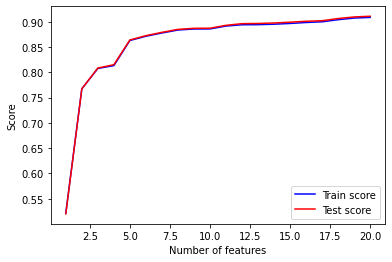

In [41]:
num_features = list(range(1,21))
fig = sns.lineplot(x = num_features, y = mean_train, color = 'b', label = 'Train score')
fig = sns.lineplot(x = num_features, y = mean_test, color = 'r', label = 'Test score')
fig.set_xlabel('Number of features')
fig.set_ylabel('Score')
plt.legend()
plt.savefig('score_vs_num_features.png', dpi = 300)